# Superposition with Theis. Transient course in class 2024-02-21

We'll use several wells at different positions startind at differnt times and look at the total ddn at a point (x, y)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1 as Wt
from scipy.special import exp1

np.logspace

<function logspace at 0x10fe66d30>

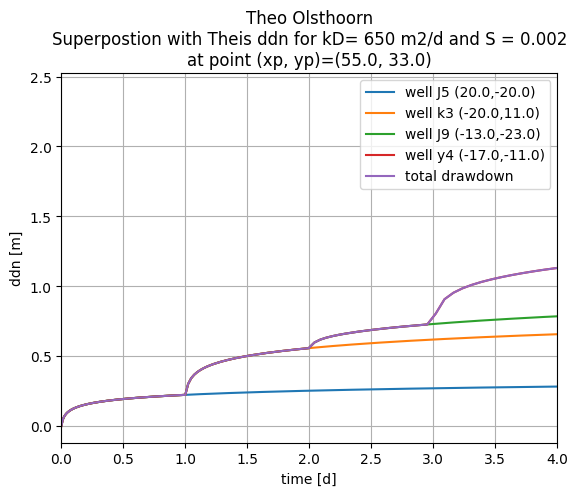

In [31]:
S = 0.002 # [-]
kD = 650 # m2/d
time = np.logspace(-3, 3, 601)

wells = [ #name Q, x, y, tstart
        ['J5', 350, 20, -20, 0],
        ['k3', 520, -20, 11, 1],
        ['J9', 200, -13, -23, 2],
        ['y4', 610, -17, -11, 3],
        ]
# Observation point
xp, yp = 55, 33

plt.title("Theo Olsthoorn\nSuperpostion with Theis ddn for kD= {:.0f} m2/d and S = {:.3f}\nat point (xp, yp)=({:.1f}, {:.1f})".format(kD, S, xp, yp))
plt.xlabel('time [d]')
plt.ylabel('ddn [m]')
plt.grid(True)
plt.xlim(0, 4)
#plt.xscale('log')

s = np.zeros(len(time))

for well in wells:    
    name, Q, xw, yw, tw = well
    r = np.sqrt( (xp - xw) ** 2 + (yp - yw) ** 2)
    L = time > tw
    twell = time[L] - tw
    u = r ** 2 * S / (4 * kD * twell)
    s[L] = s[L] + Q / (4 * np.pi * kD) * exp1(u) # Wt(u)
    plt.plot(time, s, label='well {} ({:.1f},{:.1f})'.format(name, xw, yw))
    
plt.plot(time, s, label='total drawdown'.format(name))
plt.legend()
plt.show()

# Total drawdown in the field, with countours

We do this for a few times but for a network of xp, yp values

In [35]:
xp, yp = np.linspace(-50, 50, 101), np.linspace(-50, 50, 101)
Xp, Yp = np.meshgrid(xp, yp)
Xp, Yp

(array([[-50., -49., -48., ...,  48.,  49.,  50.],
        [-50., -49., -48., ...,  48.,  49.,  50.],
        [-50., -49., -48., ...,  48.,  49.,  50.],
        ...,
        [-50., -49., -48., ...,  48.,  49.,  50.],
        [-50., -49., -48., ...,  48.,  49.,  50.],
        [-50., -49., -48., ...,  48.,  49.,  50.]]),
 array([[-50., -50., -50., ..., -50., -50., -50.],
        [-49., -49., -49., ..., -49., -49., -49.],
        [-48., -48., -48., ..., -48., -48., -48.],
        ...,
        [ 48.,  48.,  48., ...,  48.,  48.,  48.],
        [ 49.,  49.,  49., ...,  49.,  49.,  49.],
        [ 50.,  50.,  50., ...,  50.,  50.,  50.]]))

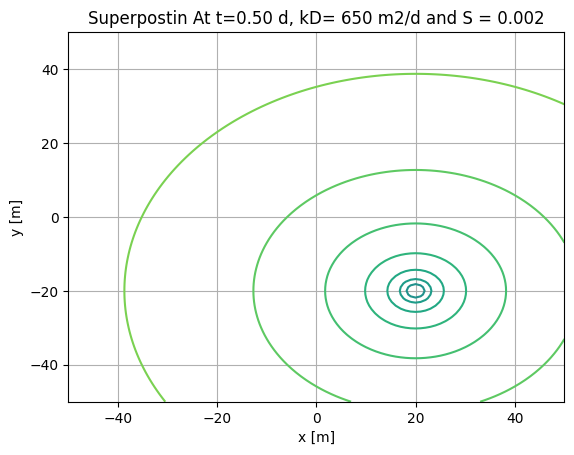

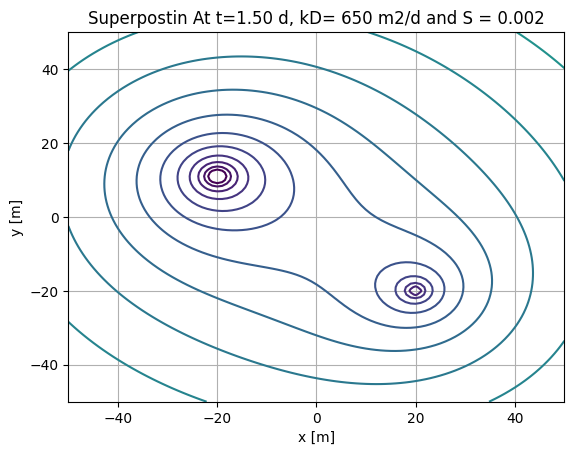

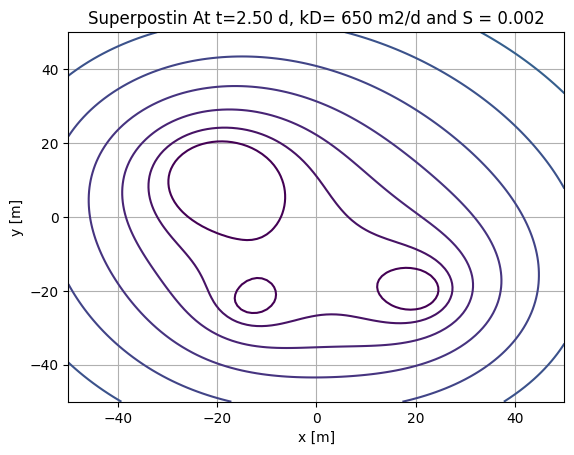

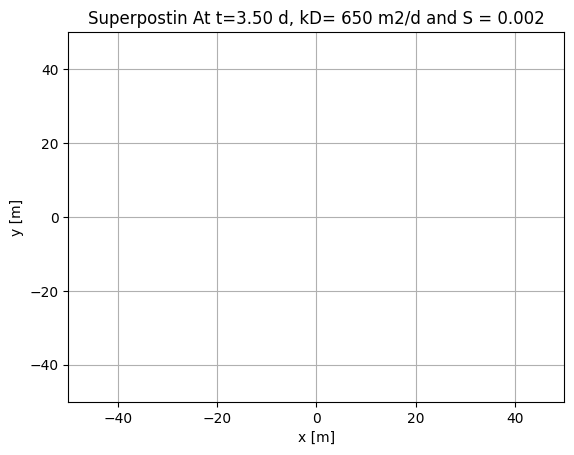

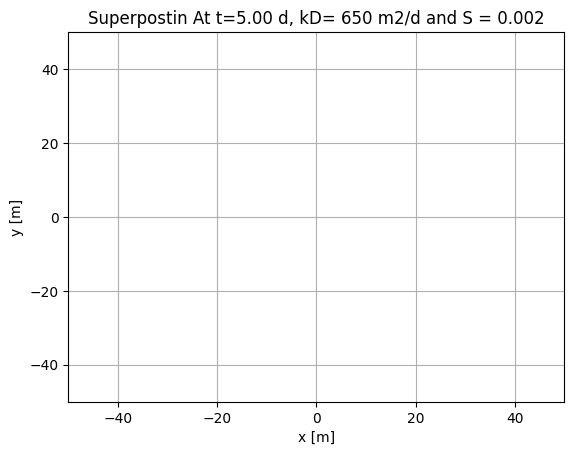

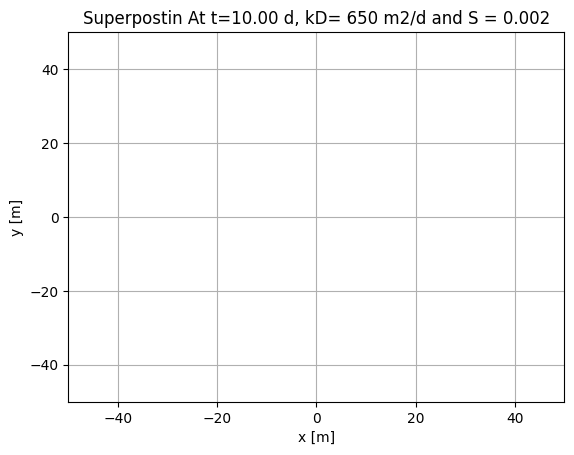

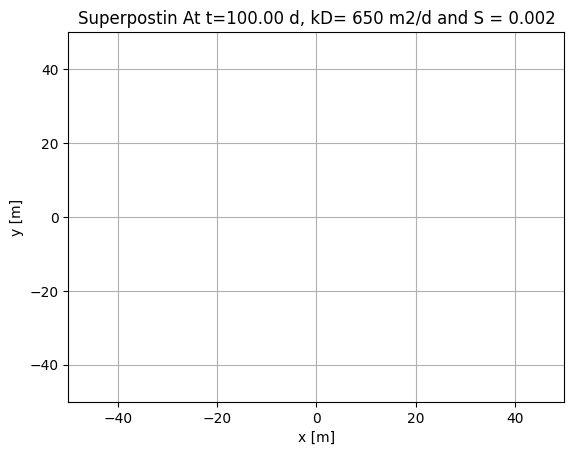

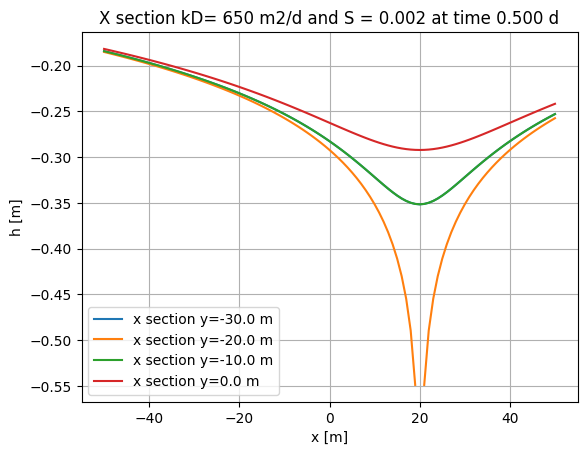

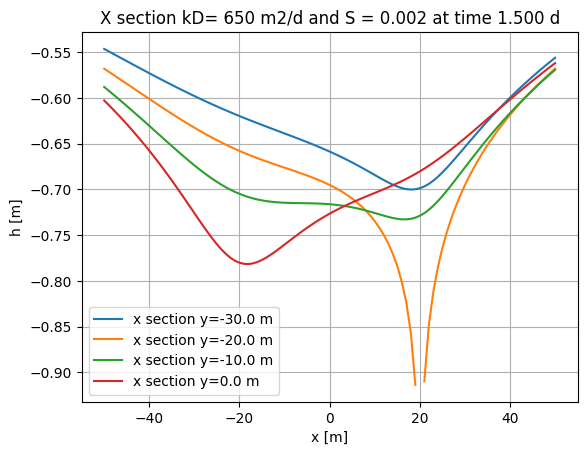

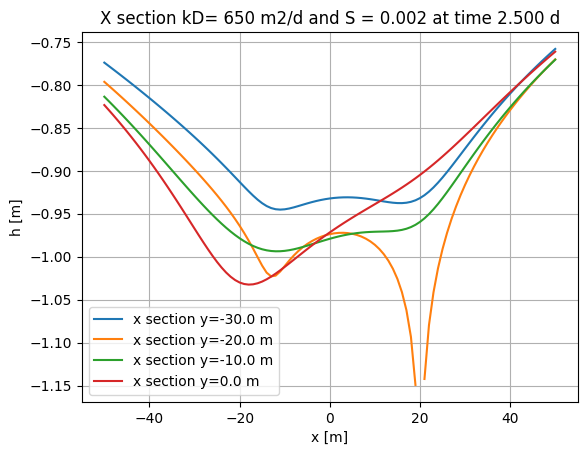

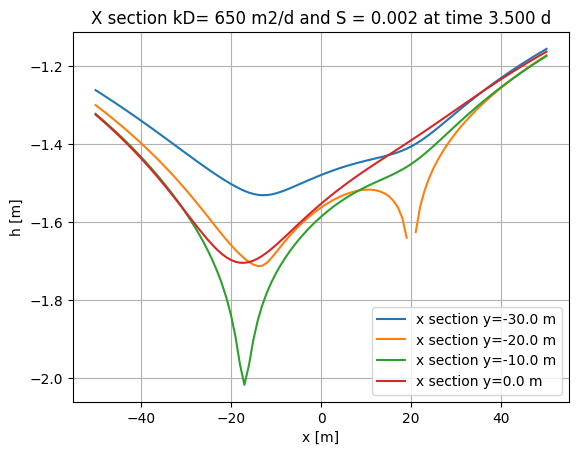

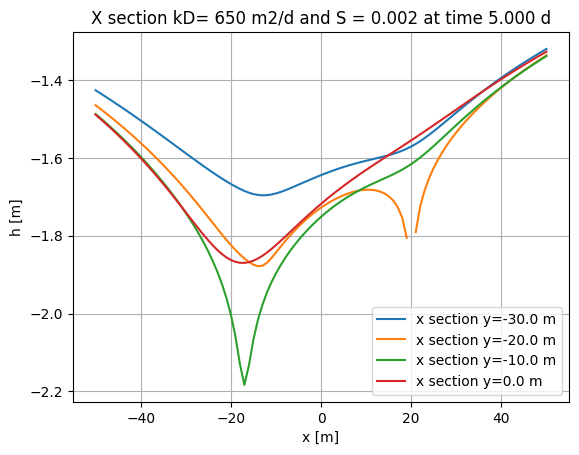

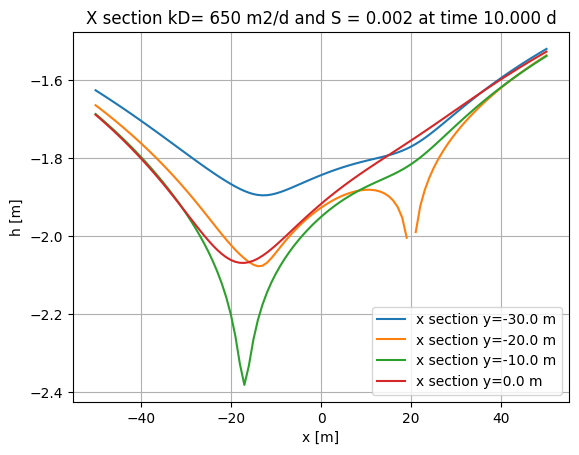

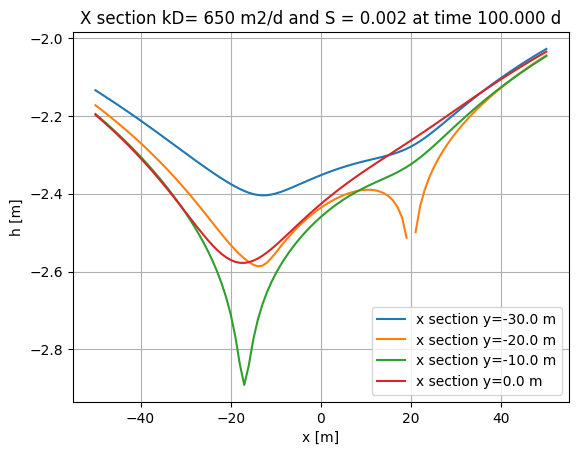

In [56]:
S = 0.002 # [-]
kD = 650 # m2/d
time =[0.5, 1.5, 2.5, 3.5, 5, 10, 100]

wells = [ #name Q, x, y, tstart
        ['J5', -350, 20, -20, 0],
        ['k3', -520, -20, 11, 1],
        ['J9', -200, -13, -23, 2],
        ['y4', -610, -17, -11, 3],
        ]
# Observation point
xp, yp = np.linspace(-50, 50, 101), np.linspace(-50, 50, 101)
Xp, Yp = np.meshgrid(xp, yp)

levels = -np.linspace(0, 1, 21)[::-1]

for t in time:
    plt.title("Superpostin At t={:.2f} d, kD= {:.0f} m2/d and S = {:.3f}".format(t, kD, S))
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.grid(True)
    
    s = np.zeros_like(Xp)
    for well in wells:    
        name, Q, xw, yw, tw = well
        r = np.sqrt( (Xp - xw) ** 2 + (Yp - yw) ** 2)
        if t > tw:
            twell = t - tw
            u = r ** 2 * S / (4 * kD * twell)
            s = s + Q / (4 * np.pi * kD) * exp1(u) # Wt(u)
    plt.contour(Xp, Yp, s, levels=levels)

    plt.show()

for t in time:
    plt.title("X section kD= {:.0f} m2/d and S = {:.3f} at time {:.3f} d".format(kD, S, t))
    plt.xlabel('x [m]')
    plt.ylabel('h [m]')

    plt.grid(True)
    
    s = np.zeros_like(Xp)
    for well in wells:    
        name, Q, xw, yw, tw = well
        r = np.sqrt( (Xp - xw) ** 2 + (Yp - yw) ** 2)
        if t > tw:
            twell = t - tw
            u = r ** 2 * S / (4 * kD * twell)
            s = s + Q / (4 * np.pi * kD) * exp1(u) # Wt(u)

    for i in [20, 30, 40, 50]:
        plt.plot(xp, s[i, :], label='x section y={} m'.format(yp[i]))
    
    plt.legend()
    plt.show()


